<a href="https://colab.research.google.com/github/Sai-Kale/AWS_LEARNING/blob/master/AWS_EKS/EKS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AWS EKS:**


**Why container**: You develop something in the Dev where the runtime engine for python is 3.6 and move it to test where its 3.6 and in prod its something else. Docker helps in bringing synergy to amongst all the environments by the providing the same runtime engine and libraries so dev doesn't need to worry.

**Container Orchestration ?**

Tasks Associate with containers running on EC2:    
- Deployment of containers
- Redundancy & availability of containers.
- Scaling up or down of containers or EC2 on which they are running.
- LB, health monitoring and service discovery etc.,..

All the above tasks can be made easy with help of K8S. Which is Container Orchestrator.

K8S architecture refer other python notebooks in this repo.





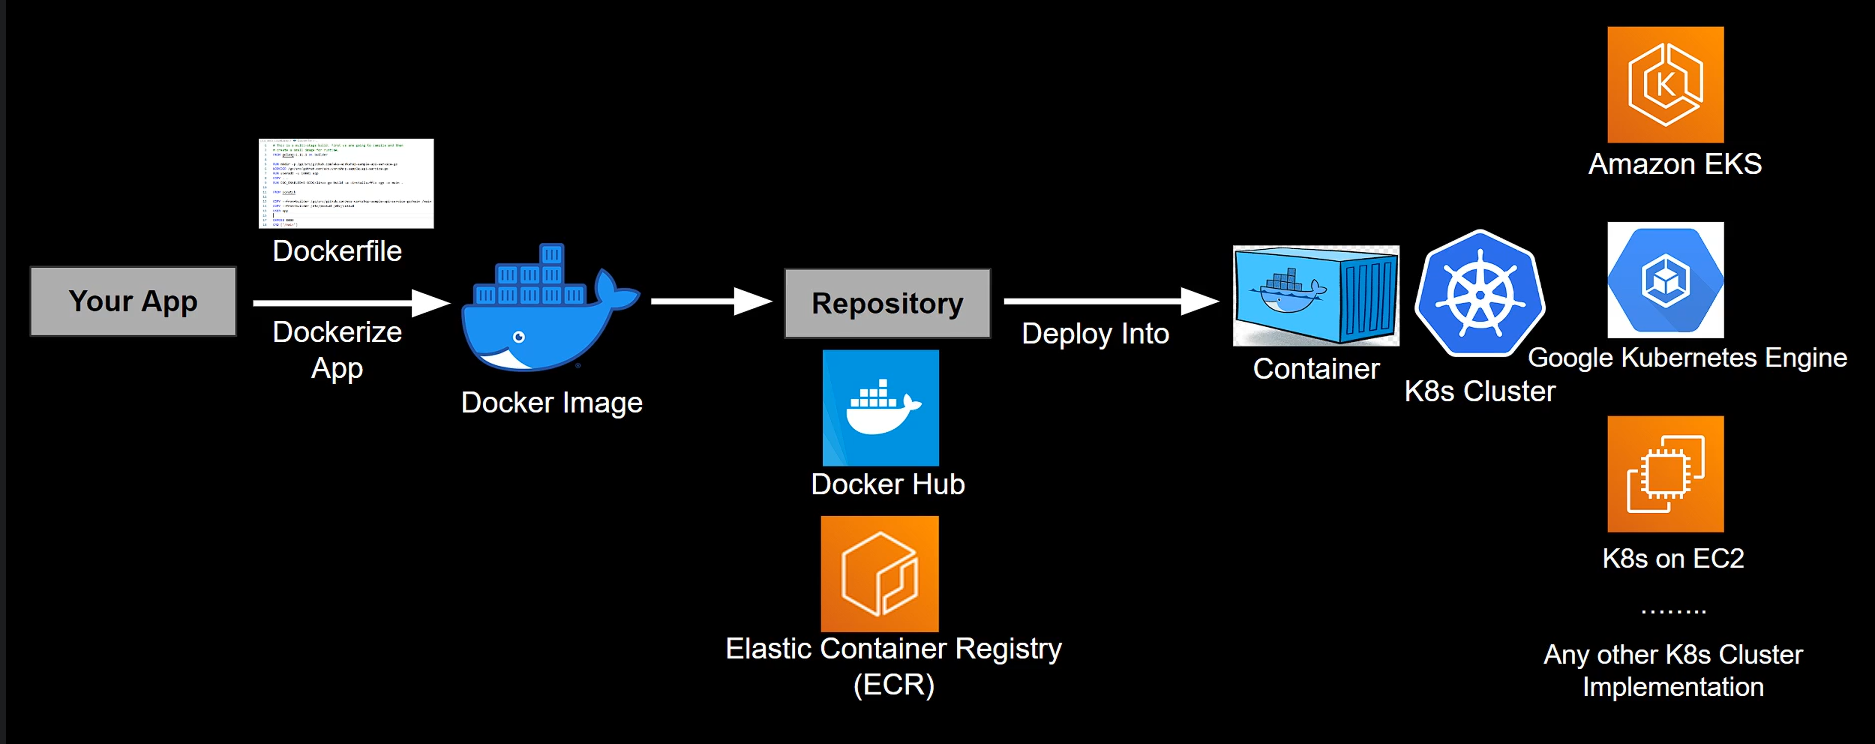

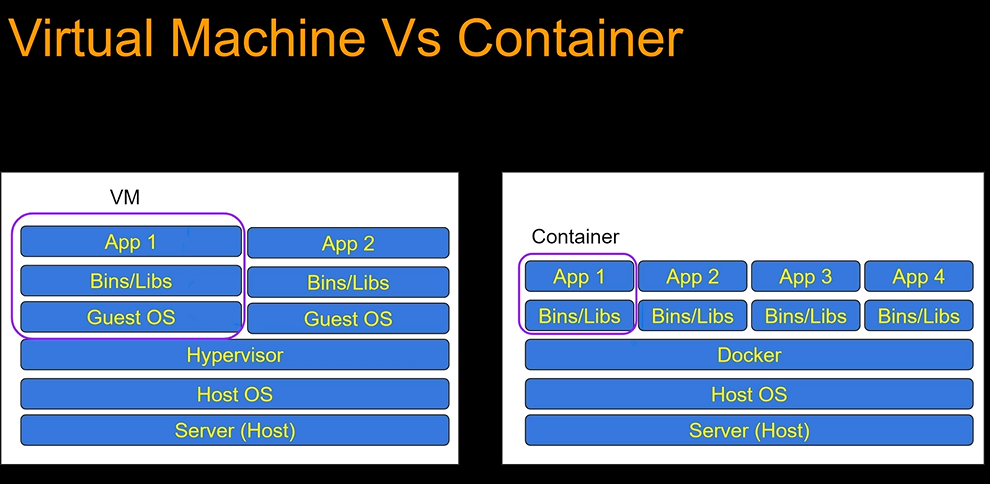

**PODs**: They are the smallest deployable unit of computing that can be created and managed by K8S. Each pod will have a IP address. In each pod we can run more than one containers known as multi container pods. Each container can be reach via different port number.

**Node**: The pods in turn run inside the Node. NPC ( Node > Pod > Container )

**Deployment** : 
- ReplicaSet is the number of replicas of a container pod you want.
- If you want to update the same replicaset isnt of much help. so we use deployments.
- If you look at the below deployment YAML file we having rolling updates strategy. It says *minReadySec* which is 10. Suppose if we update the nginx version to 1.17 the deployment will create another *replicaSet* with the new version if Nginx and wait for 10 seconds before shutting down the old version of the same pod in old replicaset.  *Maxsurge* indicates the number of pods it can update at once in a given point of time. here its only 1 i.e. it goes one by one. *maxUnavailable* is 0 is in below yaml which says at point the given number of replicasets should be running. if thats 1 then its okay with 2 pods running.



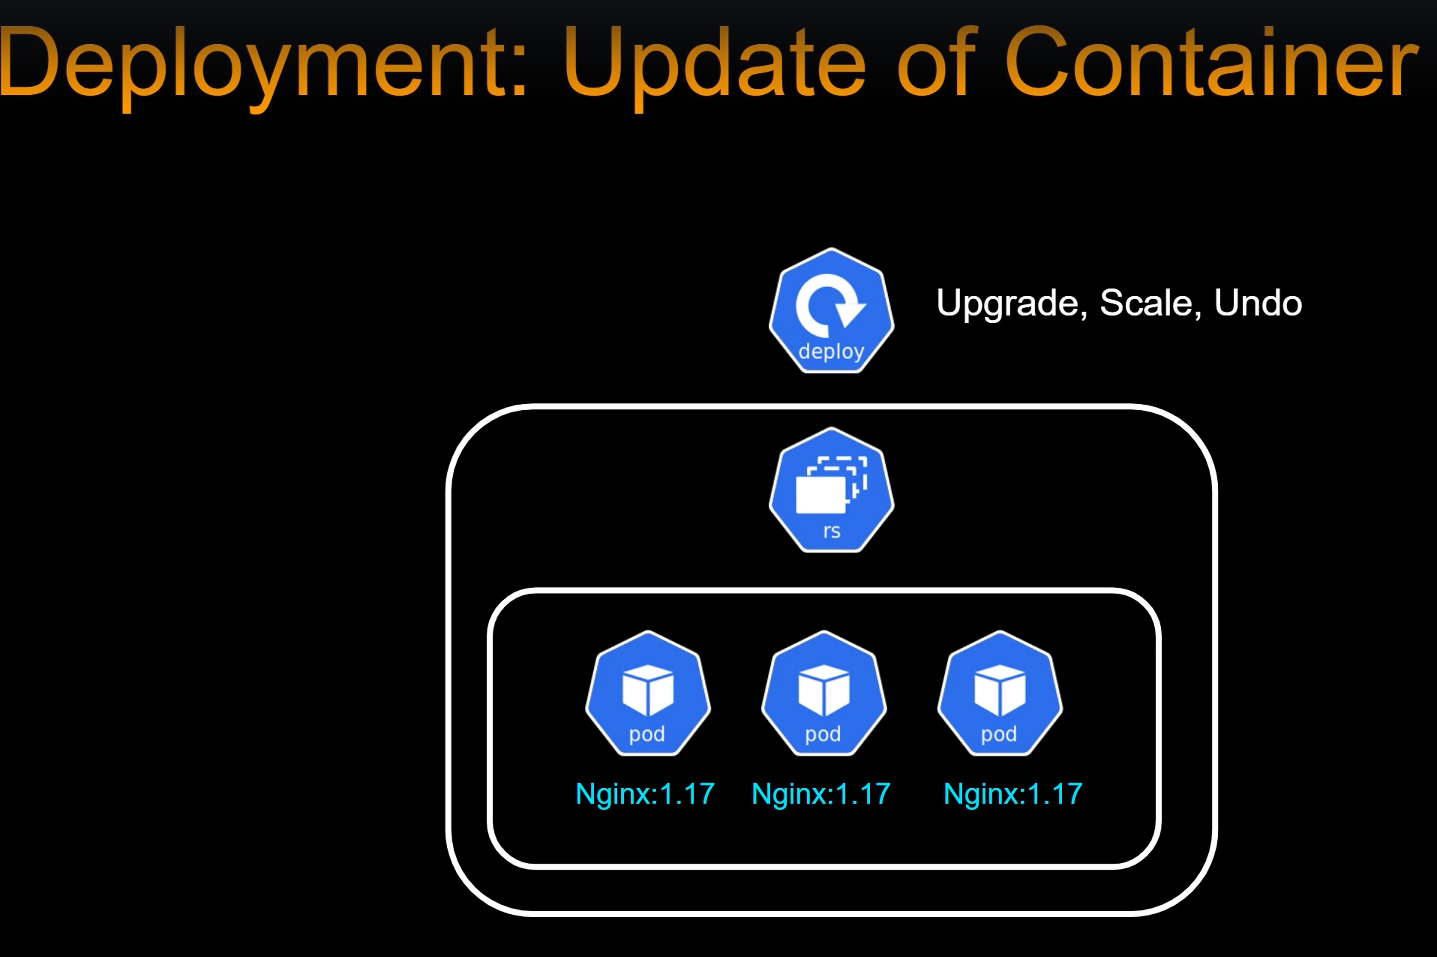

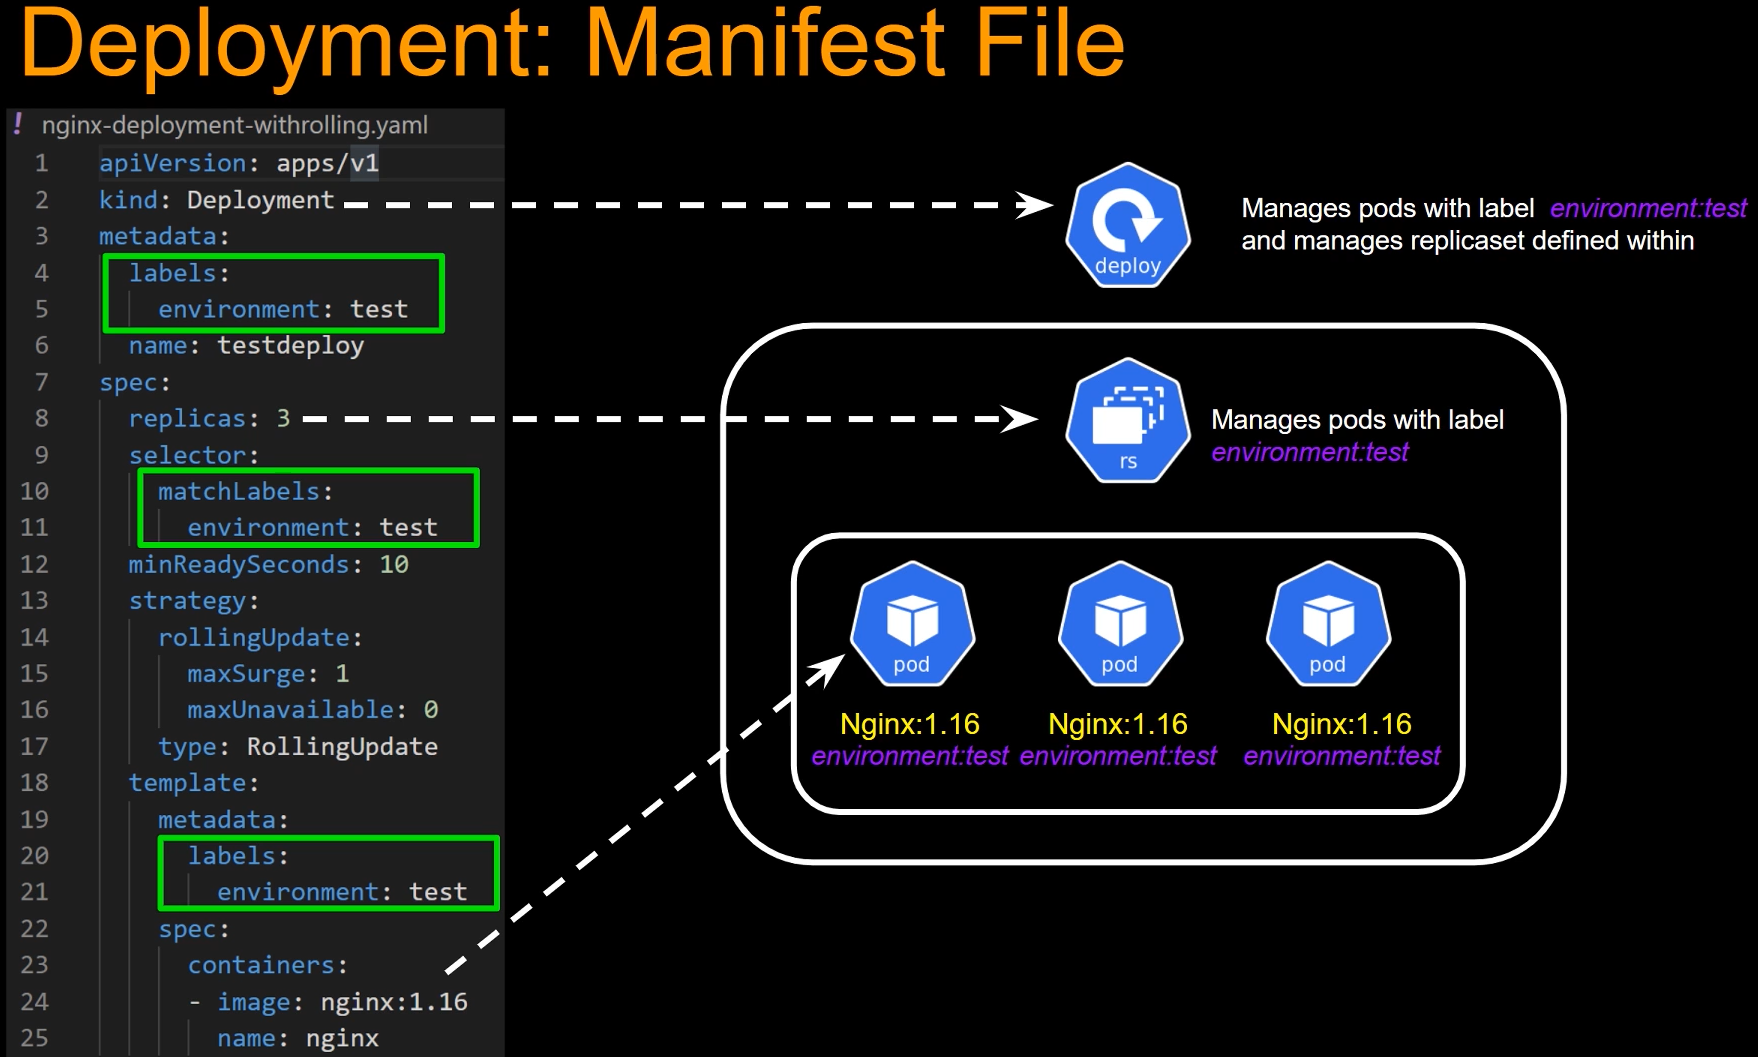

**Service**:    
- Generally the web and app pods keep dying n recreated depending upon the scalability using Horizontal Pod Autoscaler. 
-  So the IP addresses of these pods keeps changing. In order to communiate with the app pod from web server pod. we need a constant IP. This is where the service comes into picture. 
- Service is an abstraction to expose a set of pods running the application as a network service.
- Instead of traffic routing from web server to app server directly. it gets routed via service. ex: backend service.
- The service know how to distrbute traffic to which pods using ***labels and selectors.***
- Service are of 3 types:    
    - LoadBalancer
    - ClusterIp
    - Nodeport
- By default in the manifest file of service if you dont specifiy the type its gonna create a ClusterIp. As the name suggests its only accessible from within the cluster.
- Nodeport on the other hand is accessible from outside the cluster. Its another abstraction on top of ClusterIP. 
- its opens up the port on the worker  nodes for a given app server and distributes the traffic across them. NodePort isnt safe because it opens up the port on the worker nodes to the outside world.
- LoadBalancer is another abstraction layer on top of the NodePort. But it doesnt expose the given ports on worker node to the outside world and its reachble via the LB Ip and port mentioned. 
- Loadbalancer > NodePort > ClusterIP.




**Declarative vs Imperative**:  

- Declarative way is to deploy resources to K8S is by writing yaml files.
- Imperative way is using individual kubectl commands.
- In organizations we use Declarative way to maintain the CI/CD and notability.

**EKS?**

Instead of maintaining the master node. AWS takes care of the maintainence and HA of the master node.
In our own coniguration we need to make sure
- Control Plane is highly available
- Scale control plane if needed. Keep etcd up and running.
- Overhead of managing the EC2, patching, security and orchestration for K8S version upgrade

AWS EKS takes care of the above for us for Master Node.

Coming to EKS Data Plane where our application is hosted.

- *Self managed Node Groups*: You maintain EC2s , you orchestrate version upgrade, AMI rehydration, keeps pods up during upgrade.

- *Managed Node Groups*: AWS takes care of the above tasks.

- *AWS Fargate*: No EC2 server. You define and deploy pods. Container + Serverless.


**Cost of EKS** : EKS is divided into master/control plane ($0.1 per hour = $72 per month)
Worker Nodes based on the type of EC2 instances you use. 





**Ways to Spin up the EKS cluster:**

1. eksctl : its AWS specific command line tool
  - Eaiser then console. It abstracts lot of stuff using CloudFormation. Refer teh PDF in the current repo for reference commands.
2. CloudFormation : Infrastructure as Code specific to AWS
3. Terraform : Need to learn how to do this.
4. AWS CLI
5. kubectl: command to run commands against the k8s cluster. Refer the PDF in the current repo path for generic used kubectl commands.
ex: kubectl [command] [type] [name] [flags]



- The number of pods the can be spun up on a given EC2 instance depends upon the type of EC2 instance.

- Managed node groups helps in reduction of maintence overheads.


**Helm Charts**:  Suppose you want to deploy a 3 tier application. We need manifest YAML for each and every service and pods etc.,.. All these files are a nightmare to maintain there comes the Helm charts. 
- Helm is a package manager for k8s.
- Helm pkgs are called charts
- Helm charts help define, install and upgrade complex k8s application.
- they can be versioned and share across.
- helm charts can accept input parameter. kubectl need templating engine to do this like jinja
- popular pkgs are already avaiable.
Install helm chart
- Search for open source repos using *helm search hub nginx*




**EKS Logging**:     

